### Distribution of Cosine similarity scores

Summary Statistics for Cosine Similarity Scores:
count    298852.000000
mean          0.957844
std           0.064426
min           0.000000
25%           0.945911
50%           0.980512
75%           0.995748
max           1.000000
Name: similarity, dtype: float64


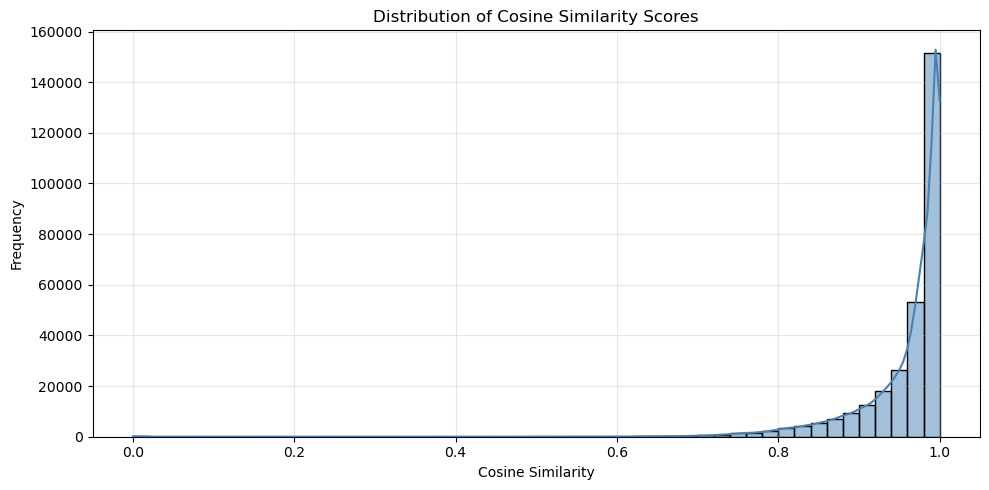

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('../data/processed/full_similarity_with_returns.csv')

# Drop missing similarity scores (if any)
df = df.dropna(subset=['similarity'])

# Summary statistics
summary_stats = df['similarity'].describe()
print("Summary Statistics for Cosine Similarity Scores:")
print(summary_stats)

# Plot histogram of similarity scores
plt.figure(figsize=(10,5))
sns.histplot(df['similarity'], bins=50, kde=True, color='steelblue')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

df


If we compate it to the original distribution, we get a much higher average with a lower variance:

![Similarity Score Distribution](../output/figs/similarity_distribution.png)

### Distribution of BAXTER

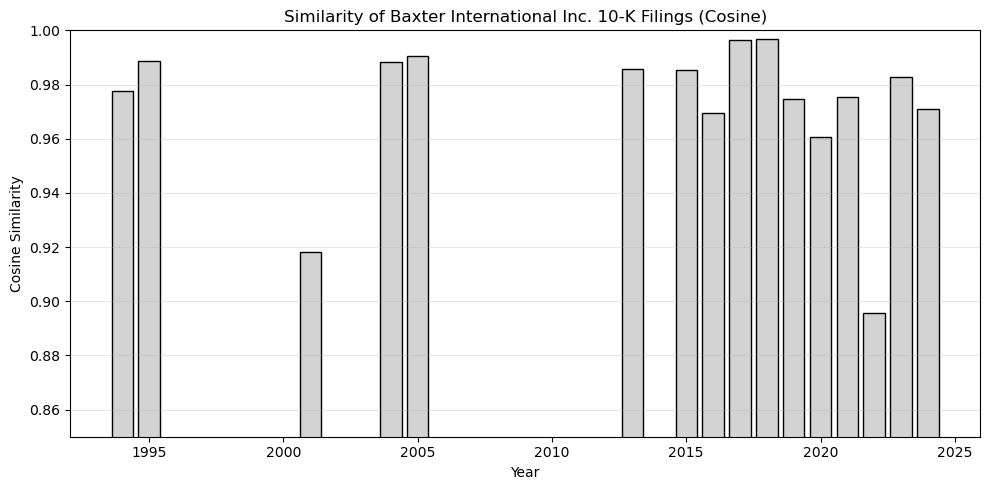

In [ ]:
# Filter to Baxter International (CIK 10456 or ticker 'bax' – adjust as needed)
df_bax = df[df['tic'].str.lower() == 'bax'].copy()

# Convert to datetime if needed
df_bax['month'] = pd.to_datetime(df_bax['month'])

# Extract year from month
df_bax['year'] = df_bax['month'].dt.year

# Group by year and compute the mean similarity score
bax_yearly = df_bax.groupby('year')['similarity'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(bax_yearly['year'], bax_yearly['similarity'], color='lightgray', edgecolor='black')

# Highlight 2010 bar in red
highlight_year = 2010
highlight_idx = bax_yearly[bax_yearly['year'] == highlight_year].index
if not highlight_idx.empty:
    bars[highlight_idx[0]].set_color('red')

# Format plot
plt.ylim(0.85, 1.0)
plt.xlabel('Year')
plt.ylabel('Cosine Similarity')
plt.title('Similarity of Baxter International Inc. 10-K Filings (Cosine)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

df_bax


We are missing similarity scores for around 100 filings, based on a quick visual examination. Many similarity scores did not compute because there were too many zeroes in the vectors to compute the distance.